In [2]:
%pip install funpymodeling


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [2]:
mallorca=pd.read_csv("Mallorca.csv")
mallorca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16867 entries, 0 to 16866
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16867 non-null  float64
 1   scrape_id                       16867 non-null  int64  
 2   last_scraped                    16867 non-null  object 
 3   source                          16867 non-null  object 
 4   name                            16867 non-null  object 
 5   host_id                         16867 non-null  int64  
 6   host_name                       16867 non-null  object 
 7   host_since                      16867 non-null  object 
 8   host_location                   12340 non-null  object 
 9   host_response_time              15434 non-null  object 
 10  host_response_rate              15434 non-null  object 
 11  host_acceptance_rate            16205 non-null  object 
 12  host_location.1                 

# Reemplazar Valores Nulos

In [30]:
mallorca_cuanti=mallorca.select_dtypes(include=["float64","int64","float","int"])
mallorca_cuali=mallorca.select_dtypes(include=["object","datetime","category"])

cuantias_mean=mallorca_cuanti.fillna(round(mallorca_cuanti.mean(),1))
cualis_bfill=mallorca_cuali.fillna(method="bfill")
cualis_ffill=mallorca_cuanti.fillna(method="ffill")

mallorca_casi_sin_nulos = pd.concat([cuantias_mean,cualis_ffill],axis=1)
mallorca_sin_nulos = mallorca_casi_sin_nulos.drop(columns=['neighbourhood_group_cleansed'])

mallorca_sin_nulos

/var/folders/yg/xy4x70qj5dsfw9snfhl6938r0000gp/T/ipykernel_60240/3263195778.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=mallorca_cuali.fillna(method="bfill")
/var/folders/yg/xy4x70qj5dsfw9snfhl6938r0000gp/T/ipykernel_60240/3263195778.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=mallorca_cuanti.fillna(method="ffill")


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
0,6.999800e+04,20241214212418,353156,2,5,39.569870,2.654640,2,1.0,1.0,...,3,0,4.95,4.92,4.93,4.95,4.97,4.89,4.81,2
1,1.068330e+05,20241214212418,551974,1,1,39.614580,3.301000,4,1.0,2.0,...,8,0,4.89,4.81,4.81,4.89,4.92,4.52,4.63,1
2,1.592180e+05,20241214212418,763897,1,1,39.738390,2.897450,3,1.0,1.0,...,31,0,4.92,4.88,4.93,4.96,4.95,4.82,4.75,1
3,1.641850e+05,20241214212418,788123,2,3,39.572710,2.644480,2,1.0,1.0,...,12,0,4.75,4.72,4.64,4.93,4.90,4.93,4.68,1
4,1.668200e+05,20241214212418,794829,4,5,39.678940,2.500520,2,1.0,1.0,...,33,0,4.67,4.75,4.35,4.87,4.91,4.94,4.60,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16862,1.308224e+18,20241214212418,588497055,1,1,39.573649,2.648082,1,0.5,1.0,...,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1
16863,1.308462e+18,20241214212418,587006009,1002,1152,39.607365,2.556080,2,1.0,1.0,...,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,83
16864,1.308462e+18,20241214212418,587006009,1002,1152,39.607365,2.556080,2,1.0,1.0,...,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,83
16865,1.308462e+18,20241214212418,587006009,1002,1152,39.607365,2.556080,2,1.0,1.0,...,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,83


In [31]:
nulos=mallorca_sin_nulos.isnull().sum().sum()
nulos

0

# Eliminar Outliers

In [14]:
cuantitativas=mallorca.select_dtypes(include=["float64","int64","float","int"])
cualitativas=mallorca.select_dtypes(include=["object","datetime","category"])
y=cuantitativas

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75+1.5*iqr
Limite_Inferior_iqr= percentile25-1.5*iqr
iqr=cuantitativas[(y<=Limite_Superior_iqr)&y>=(Limite_Inferior_iqr)]
iqr2=iqr.fillna(round(iqr.mean(),1))
rango_intercuartilico=pd.concat([cualitativas,iqr2],axis=1)
rango_intercuartilico

,last_scraped,source,name,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_location.1,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
0,2024-12-15,city scrape,COZY HIDEAWAY LOFT... MI AMOR...,Lor,2011-01-19,"Palma, Spain",within an hour,100%,91%,t,...,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2024-12-15,city scrape,Villa with a big pool in Mallorca,Xisco,2011-05-02,"Palma de Mallorca, Spain",NaN,NaN,88%,f,...,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2024-12-15,city scrape,Farmhouse in Nature -ET-3025,Gabriel,2011-06-30,"Inca, Spain",within an hour,100%,100%,t,...,31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2024-12-15,city scrape,Corazón de Palma-Habitación con baño privado.,Maria,2011-07-07,"Costa d'en Blanes, Spain",within an hour,100%,99%,NaN,...,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2024-12-15,city scrape,Guest House with Great sea views - Principal Room,Toni,2011-07-08,"Balearic Islands, Spain",within an hour,100%,100%,f,...,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16862,2024-12-15,city scrape,Very Cosy and very central,Martina,2024-07-09,"Palma, Spain",within an hour,100%,100%,f,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
16863,2024-12-15,city scrape,Habitación 5,Holidu,2024-07-02,"Palma, Spain",within an hour,100%,99%,f,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83
16864,2024-12-15,city scrape,Habitación 4,Holidu,2024-07-02,"Palma, Spain",within an hour,100%,99%,f,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83
16865,2024-12-15,city scrape,Habitación 3,Holidu,2024-07-02,"Palma, Spain",within an hour,100%,99%,f,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83


# Análisis Univariado

Text(0, 0.5, 'Frecuencia')

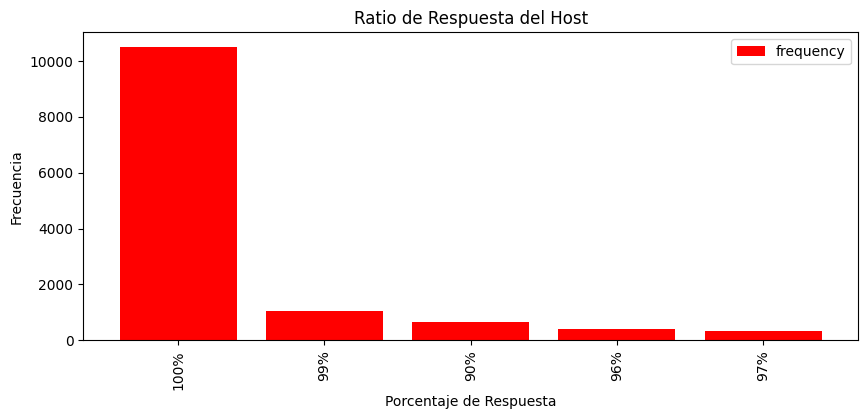

In [105]:
#Obtengo un análisis univariado de una variable categórica en específico
tabla=freq_tbl(mallorca["host_response_rate"])
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
tabla_cfiltro= tabla.drop(['percentage','cumulative_perc'], axis=1)
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
tabla_filtrada= tabla_cfiltro[tabla_cfiltro['frequency']>1]
#Ajusto el indice de mi dataframe
filtrada_index= tabla_filtrada.set_index("host_response_rate")
#Realizamos grafico de barras del dataframe filtrado
filtrada_index.head(5).plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Ratio de Respuesta del Host')
plt.xlabel('Porcentaje de Respuesta')
plt.ylabel('Frecuencia')

In [21]:
#Generamos un función para generar menos código
def analisis_univariado(variable):
    tabla=freq_tbl(mallorca[variable])
    tabla_cfiltro= tabla.drop(['percentage','cumulative_perc'], axis=1)
    tabla_filtrada= tabla_cfiltro[tabla_cfiltro['frequency']>1]
    filtrada_index= tabla_filtrada.set_index(variable)
    return(filtrada_index)

Text(0, 0.5, 'Frecuencia')

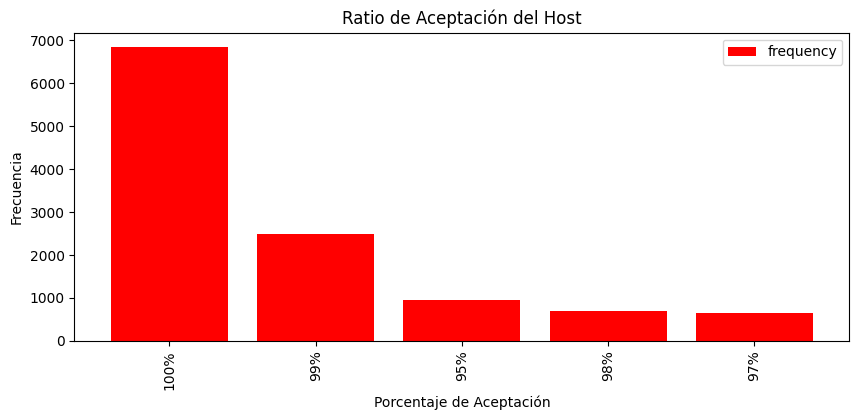

In [ ]:
#Llamamos a la función y sólo nos encargamos de definir los títulos y la gráfica
#host_acceptance_rate:
filtrada_index=analisis_univariado("host_acceptance_rate")
filtrada_index.head(5).plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Ratio de Aceptación del Host')
plt.xlabel('Porcentaje de Aceptación')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

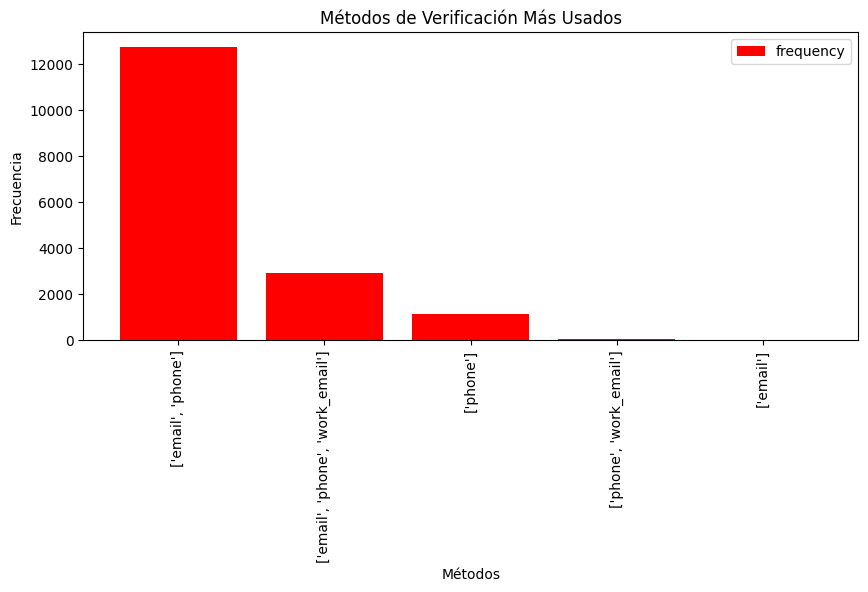

In [ ]:
#host_verifications:
filtrada_index=analisis_univariado("host_verifications")
filtrada_index.head(5).plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Métodos de Verificación Más Usados')
plt.xlabel('Métodos')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Cantidad de Host que Tienen PP')

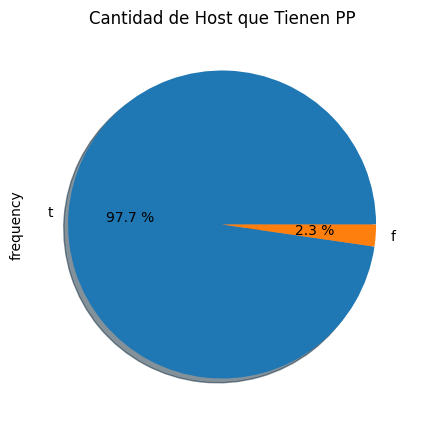

In [ ]:
#host_has_profile_pic:
filtrada_index=analisis_univariado("host_has_profile_pic")
filtrada_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Cantidad de Host que Tienen PP')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

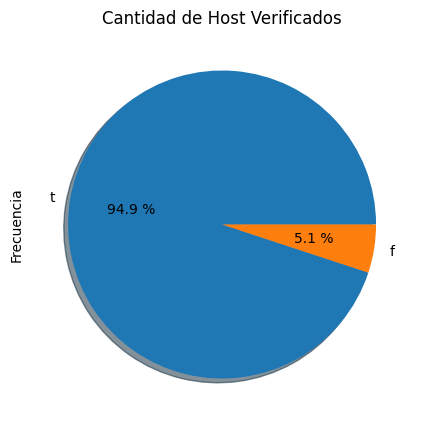

In [ ]:
#host_identity_verified:
filtrada_index=analisis_univariado("host_identity_verified")
filtrada_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Cantidad de Host Verificados')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

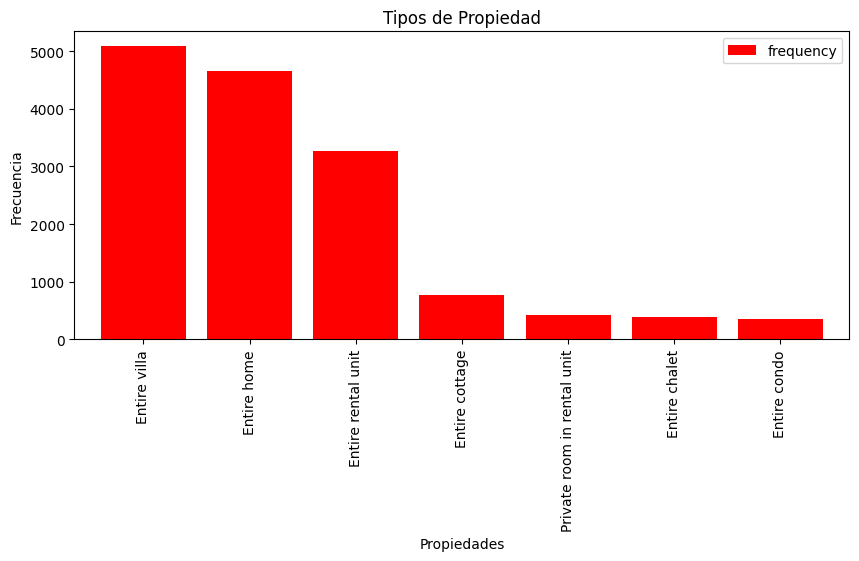

In [ ]:
#property_type:
filtrada_index=analisis_univariado("property_type")
filtrada_index.head(7).plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Tipos de Propiedad')
plt.xlabel('Propiedades')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

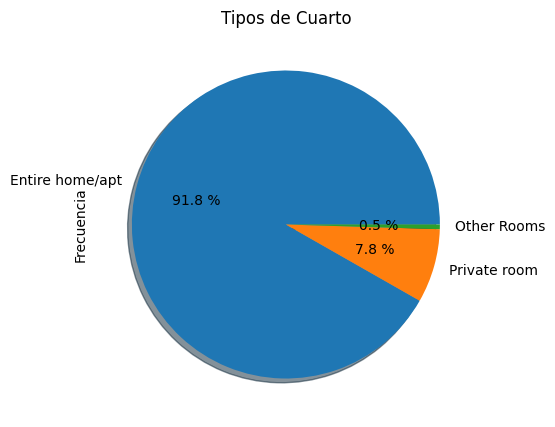

In [ ]:
#room_type:
filtrada_index=analisis_univariado("room_type")
primeras_filas = filtrada_index.iloc[:-2]
ultimas_filas = filtrada_index.iloc[-2:]
nueva_fila = pd.DataFrame({'frequency': [ultimas_filas['frequency'].sum()]}, index=['Other Rooms'])
filtrada_index = pd.concat([primeras_filas, nueva_fila])
filtrada_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Tipos de Cuarto')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

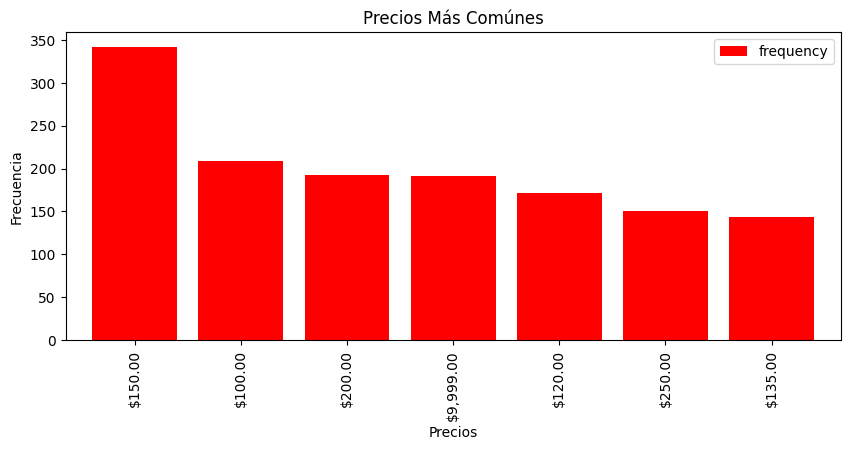

In [54]:
#price:
filtrada_index=analisis_univariado("price")
filtrada_index.head(7).plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Precios Más Comúnes')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

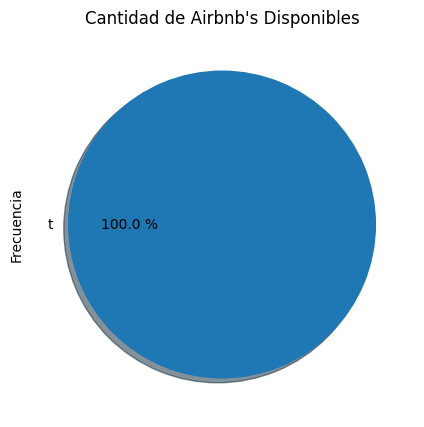

In [ ]:
#has_availability:
filtrada_index=analisis_univariado("has_availability")
filtrada_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title("Cantidad de Airbnb's Disponibles")
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

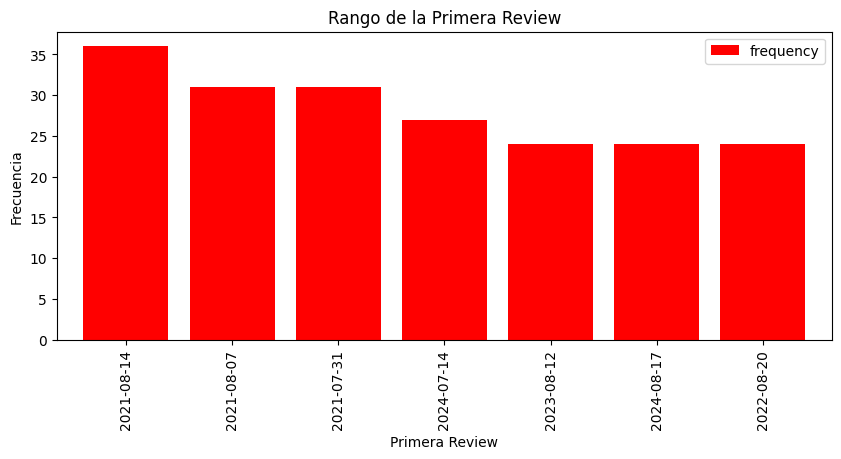

In [ ]:
#first_review:
filtrada_index=analisis_univariado("first_review")
filtrada_index.head(7).plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Rango de la Primera Review')
plt.xlabel('Primera Review')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

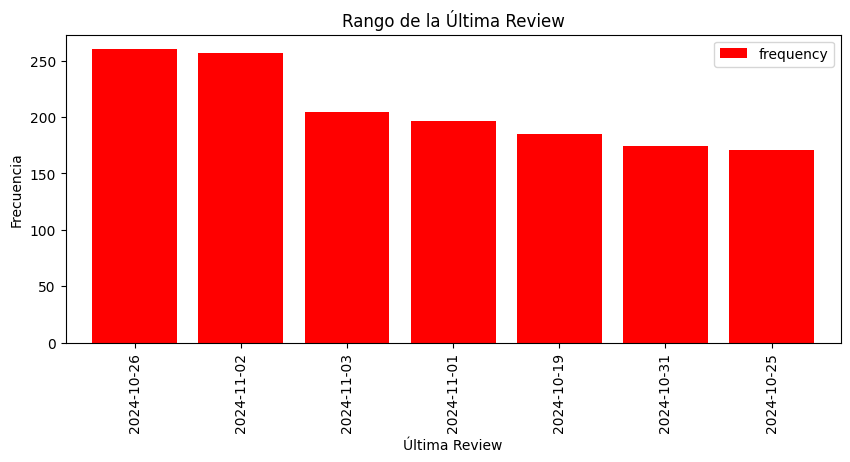

In [ ]:
#last_review:
filtrada_index=analisis_univariado("last_review")
filtrada_index.head(7).plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Rango de la Última Review')
plt.xlabel('Última Review')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

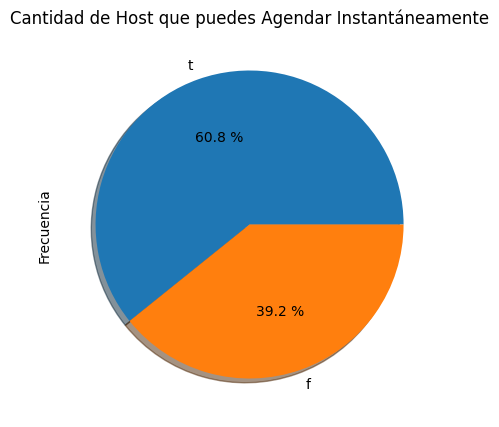

In [ ]:
#instant_bookable:
filtrada_index=analisis_univariado("instant_bookable")
filtrada_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Cantidad de Host que puedes Agendar Instantáneamente')
plt.ylabel('Frecuencia')

# Categorizar Variables

In [20]:
mallorca=pd.read_csv("Mallorca.csv")

In [22]:
# Ajustar maximo de filas
pd.options.display.max_rows = None
#Corroboramos valores nulos
valores_nulos=mallorca.isnull().sum()
valores_nulos
#Calculamos el numero total de la población "n"
n=16867
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Maxi=mallorca["host_total_listings_count"].max()
Mini=mallorca["host_total_listings_count"].min()
limites= [Mini, Maxi]
limites
#Calculamos el rango R
R=Maxi - Mini
R
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
ni
#Calculamos el Ancho del Intervalo "i"
i=R/ni
print(Mini,Maxi,i)

1 9949 661.7104612906584


In [23]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
intervalos=np.linspace(1, 9949, 6)
intervalos

array([1.0000e+00, 1.9906e+03, 3.9802e+03, 5.9698e+03, 7.9594e+03,
       9.9490e+03])

In [25]:
#Creamos las categorías 
categorias= ["1-1990","1990-3980","3980-5969","5969-7959","7959-9949"]
#Finalmente creamos las categorías en la columna numérica
mallorca['host_total_listings_count']=pd.cut(x= mallorca['host_total_listings_count'], bins=intervalos, labels= categorias )

Text(0.5, 1.0, 'Host Total Listings Count')

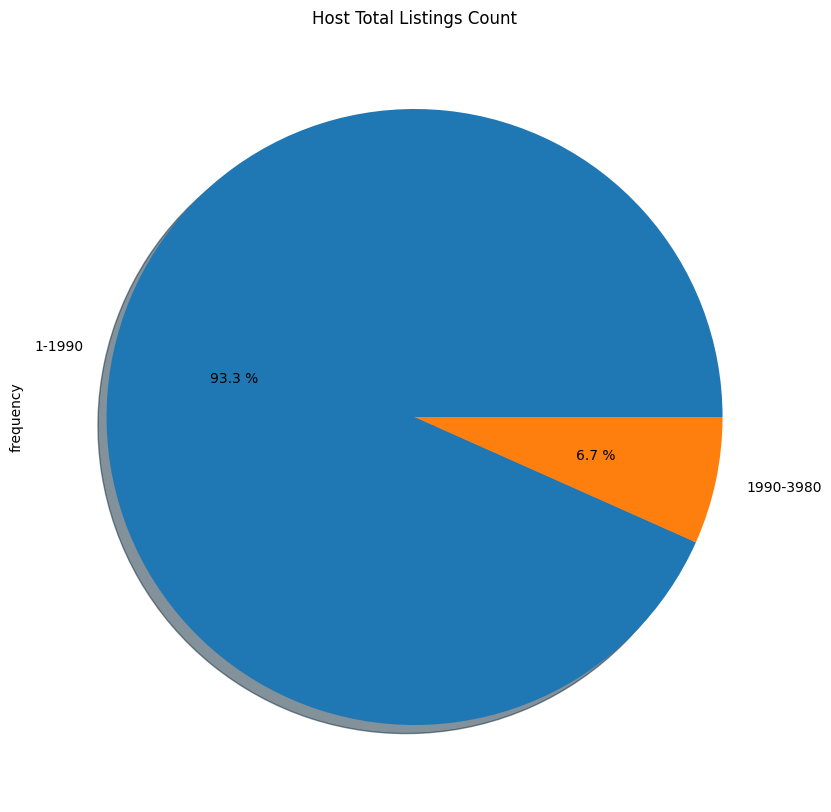

In [52]:
filtrada_index=analisis_univariado("host_total_listings_count")
filtrada_index["frequency"].head(2).plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Host Total Listings Count')

In [ ]:
#Generamos otra función para facilitar el código
def categorizacion(variable):
    n=16867
    Maxi=mallorca[variable].max()
    Mini=mallorca[variable].min()
    limites= [Mini, Maxi]
    R=Maxi-Mini
    ni= 1+3.32*np.log10(n)
    i=R/ni
    return("Límites:",limites,"i:",i)

In [28]:
#accommodates
info=categorizacion("accommodates")
info

('Límites:', [1, 16], 'i:', 0.9977540128025609)

In [29]:
intervalos=np.linspace(1, 16, 6)
intervalos

array([ 1.,  4.,  7., 10., 13., 16.])

In [30]:
categorias= ["1-4", "4-7","7-10", "10-13","13-16"]
mallorca['accommodates']=pd.cut(x= mallorca['accommodates'], bins=intervalos, labels= categorias )

Text(0.5, 1.0, 'Capacidad de Personas')

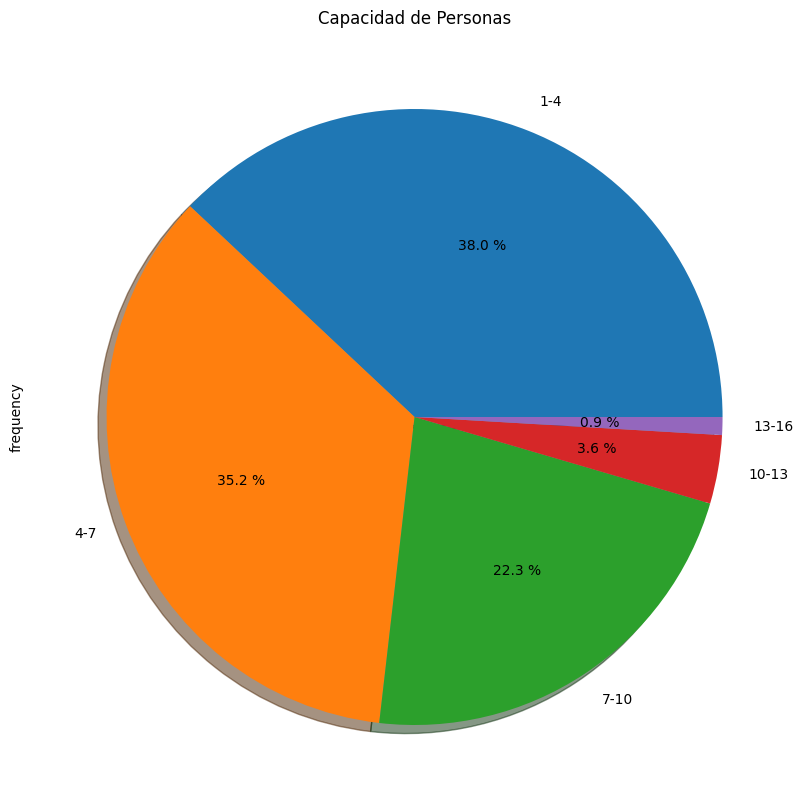

In [68]:
filtrada_index=analisis_univariado("accommodates")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Capacidad de Personas')

In [34]:
#bathrooms
info=categorizacion("bathrooms")
info

('Límites:', [0.0, 19.0], 'i:', 1.2638217495499104)

In [ ]:
intervalos=np.linspace(0, 19, 6)
intervalos

array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. ])

In [37]:
categorias= ["1-3", "3-7","7-11", "11-15","15-19"]
mallorca['bathrooms']=pd.cut(x= mallorca['bathrooms'], bins=intervalos, labels= categorias )

Text(0.5, 1.0, 'Total de Baños')

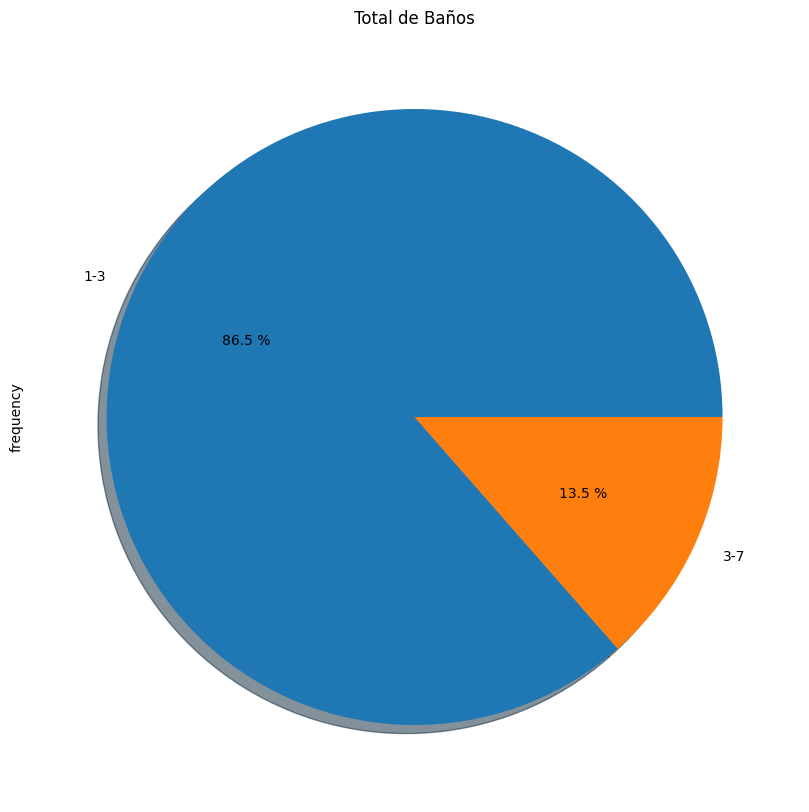

In [67]:
filtrada_index=analisis_univariado("bathrooms")
filtrada_index["frequency"].head(2).plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Total de Baños')

In [41]:
#beds
info=categorizacion("beds")
info

('Límites:', [0.0, 32.0], 'i:', 2.1285418939787966)

In [43]:
intervalos=np.linspace(0, 32, 6)
intervalos

array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. ])

In [44]:
categorias= ["0-6", "6-12","12-19", "19-25","25-32"]
mallorca['beds']=pd.cut(x= mallorca['beds'], bins=intervalos, labels= categorias )

Text(0.5, 1.0, 'Total de Camas')

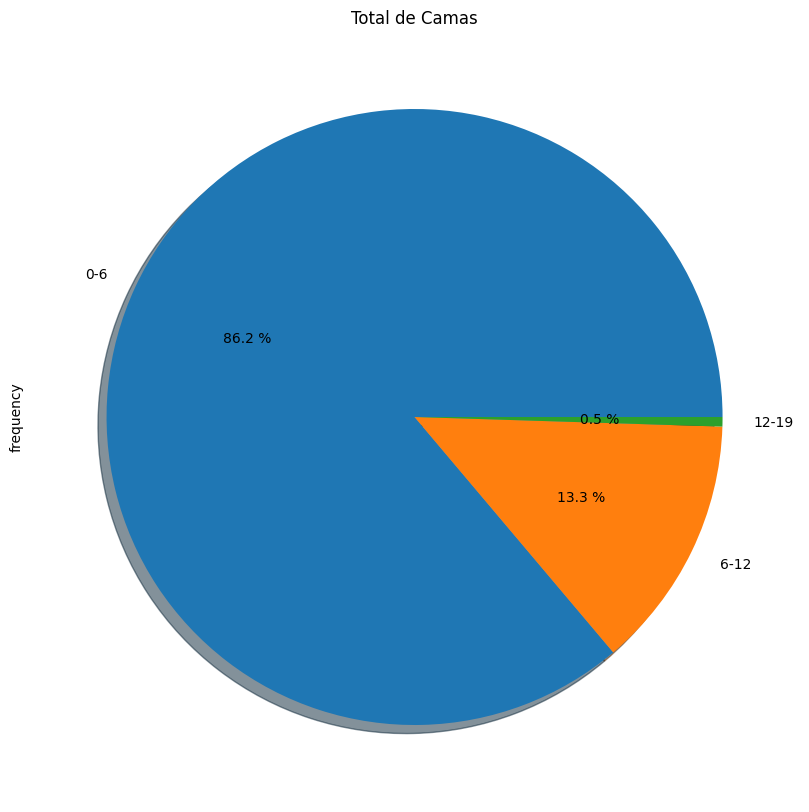

In [66]:
filtrada_index=analisis_univariado("beds")
filtrada_index["frequency"].head(3).plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Total de Camas')

In [56]:
#availability_365
info=categorizacion("availability_365")
info

('Límites:', [0, 365], 'i:', 24.27868097819565)

In [57]:
intervalos=np.linspace(0, 365, 6)
intervalos

array([  0.,  73., 146., 219., 292., 365.])

In [59]:
categorias= ["0-73", "73-146","146-219", "219-292","292-365"]
mallorca['availability_365']=pd.cut(x= mallorca['availability_365'], bins=intervalos, labels= categorias )

Text(0.5, 1.0, 'Disponibilidad a lo Largo del Año')

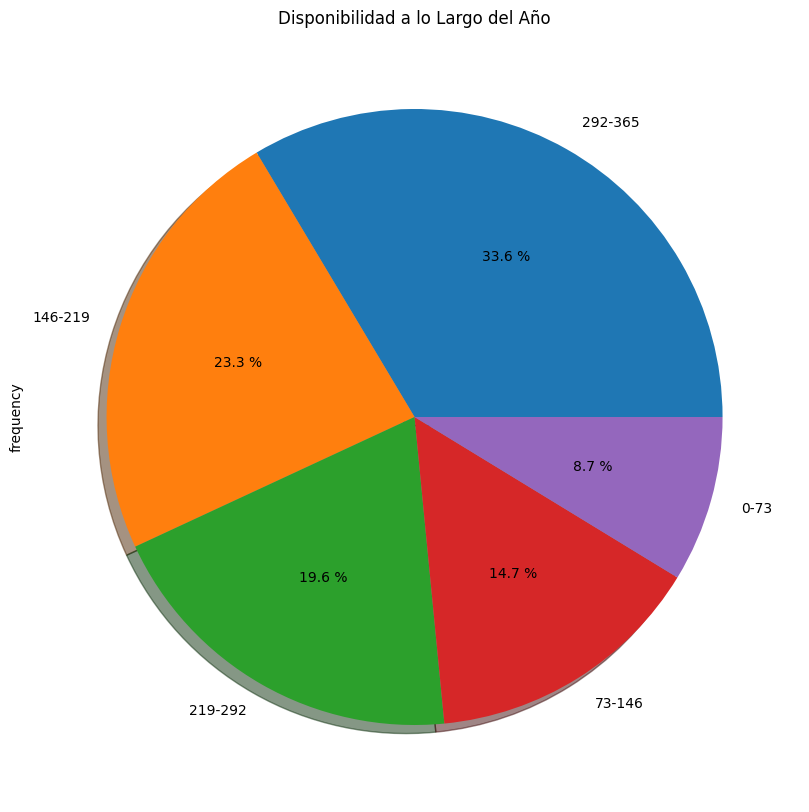

In [60]:
filtrada_index=analisis_univariado("availability_365")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Disponibilidad a lo Largo del Año')

In [61]:
#number_of_reviews
info=categorizacion("number_of_reviews")
info

('Límites:', [0, 2039], 'i:', 135.62802880696145)

In [78]:
intervalos=np.linspace(0, 2039, 6)
intervalos

array([   0. ,  407.8,  815.6, 1223.4, 1631.2, 2039. ])

In [ ]:
categorias= ["0-407", "407-815","815-1223", "1223-1631","1631-2029"]
mallorca['number_of_reviews']=pd.cut(x= mallorca['number_of_reviews'], bins=intervalos, labels= categorias )

Text(0.5, 1.0, 'Cantidad de Reviews')

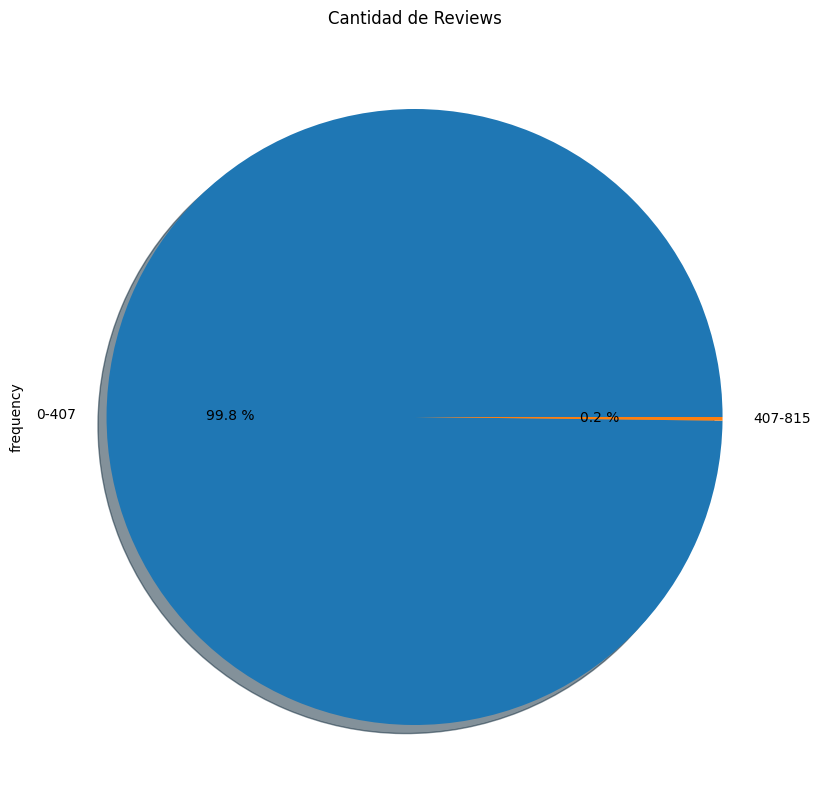

In [77]:
filtrada_index=analisis_univariado("number_of_reviews")
filtrada_index["frequency"].head(2).plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Cantidad de Reviews')

In [69]:
#review_scores_value
info=categorizacion("review_scores_value")
info

('Límites:', [1.0, 5.0], 'i:', 0.26606773674734957)

In [71]:
intervalos=np.linspace(0, 5, 6)
intervalos

array([0., 1., 2., 3., 4., 5.])

In [72]:
categorias= ["0-1","1-2","2-3","3-4","4-5"]
mallorca['review_scores_value']=pd.cut(x= mallorca['review_scores_value'], bins=intervalos, labels= categorias )

Text(0.5, 1.0, 'Calificación Promedio')

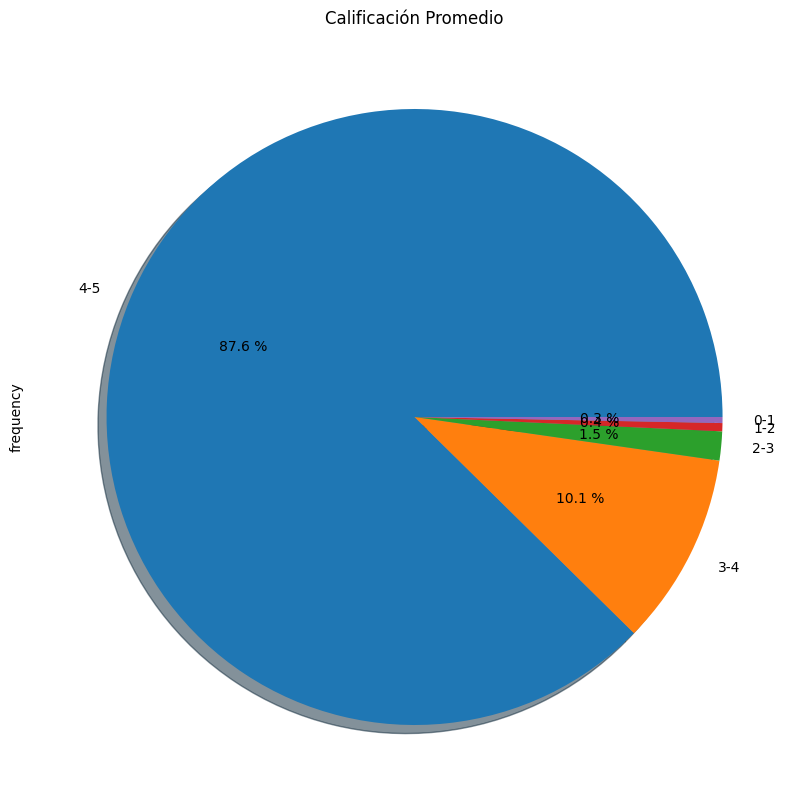

In [73]:
filtrada_index=analisis_univariado("review_scores_value")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Calificación Promedio')